In [8]:
# Install gdown if not already installed
!pip install gdown


In [9]:
import gdown

# Shared link from your message:
# https://drive.google.com/file/d/12u_T3ZSRkKwHM8msfDe9OdEmhZmvT6Eo/view?usp=drive_link

# Convert to downloadable format
file_id = "12u_T3ZSRkKwHM8msfDe9OdEmhZmvT6Eo"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "Au_nanoparticle_dataset.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=12u_T3ZSRkKwHM8msfDe9OdEmhZmvT6Eo
To: /content/Au_nanoparticle_dataset.csv
100%|██████████| 2.43M/2.43M [00:00<00:00, 34.5MB/s]


'Au_nanoparticle_dataset.csv'

In [10]:
import pandas as pd

# Load CSV
df = pd.read_csv("Au_nanoparticle_dataset.csv")
df.head()


,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [11]:
# Filter only the required columns
new_df = df[["N_total", "N_bulk", "N_surface", "R_avg"]]
new_df.head()


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831


In [12]:
# Show first 20 rows
new_df.head(20)


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [13]:
# Get mean, std, quartiles
summary = new_df.describe()
summary


,N_total,N_bulk,N_surface,R_avg
count,4000.000000,4000.000000,4000.00000,4000.000000
mean,3476.786500,2521.550250,955.23625,20.654363
std,3679.286769,2976.232459,721.87022,7.610716
min,236.000000,89.000000,137.00000,8.528600
25%,1061.000000,618.750000,437.00000,15.160725
50%,1867.000000,1199.000000,666.00000,18.629250
75%,4503.000000,3183.000000,1301.75000,25.525125
max,14277.000000,11580.000000,3190.00000,39.239200


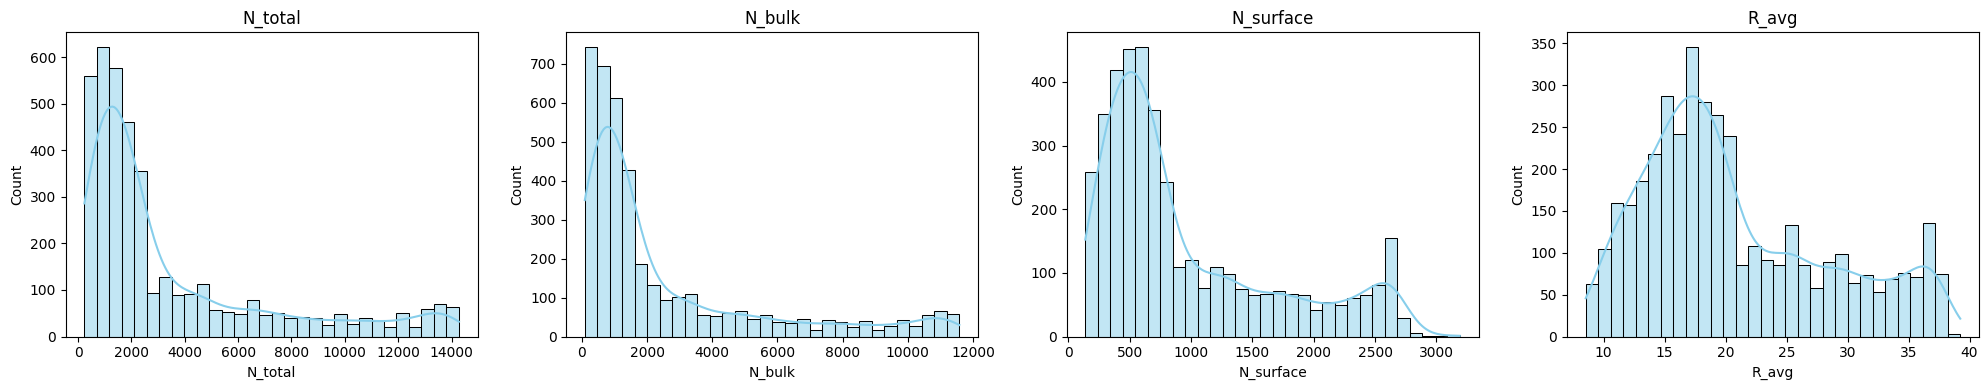

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 4))
for i, col in enumerate(new_df.columns):
    plt.subplot(1, 4, i + 1)
    sns.histplot(new_df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


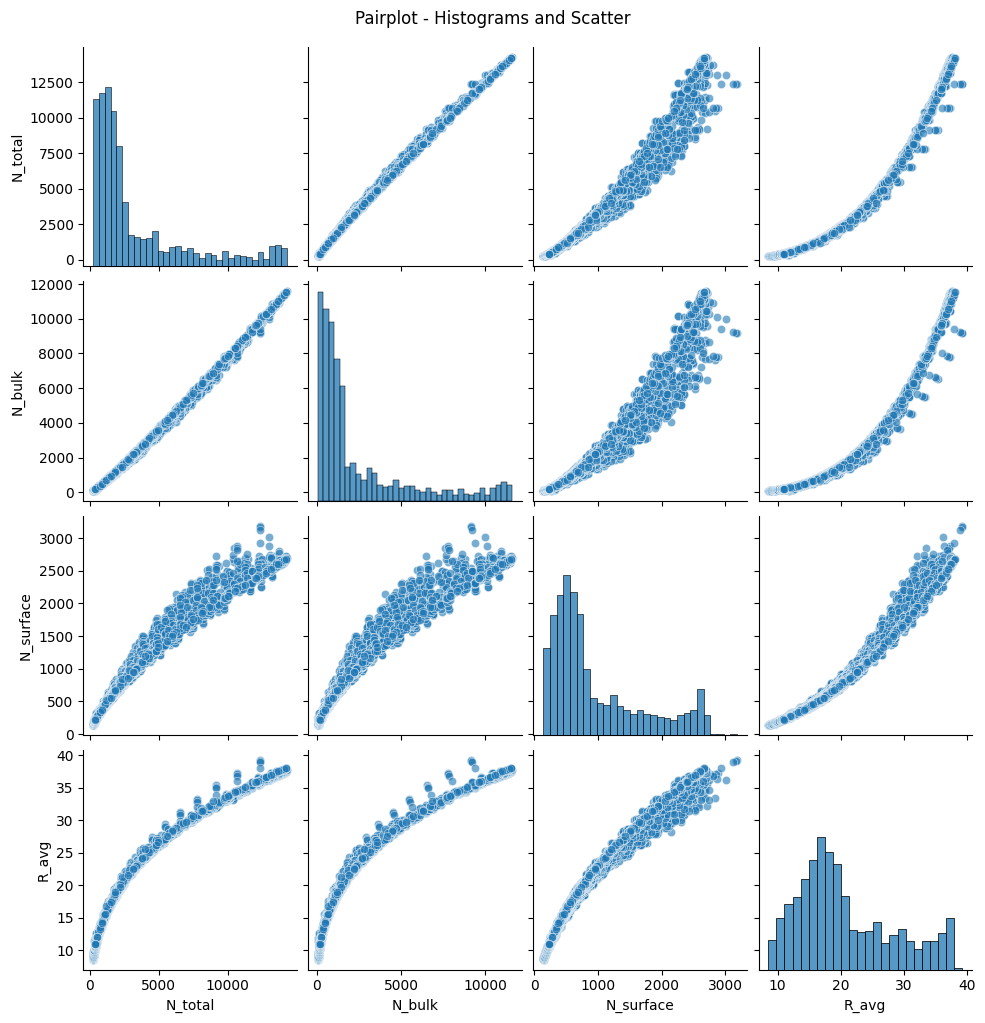

In [15]:
sns.pairplot(new_df, kind="scatter", diag_kind="hist", plot_kws={"alpha": 0.6})
plt.suptitle("Pairplot - Histograms and Scatter", y=1.02)
plt.show()


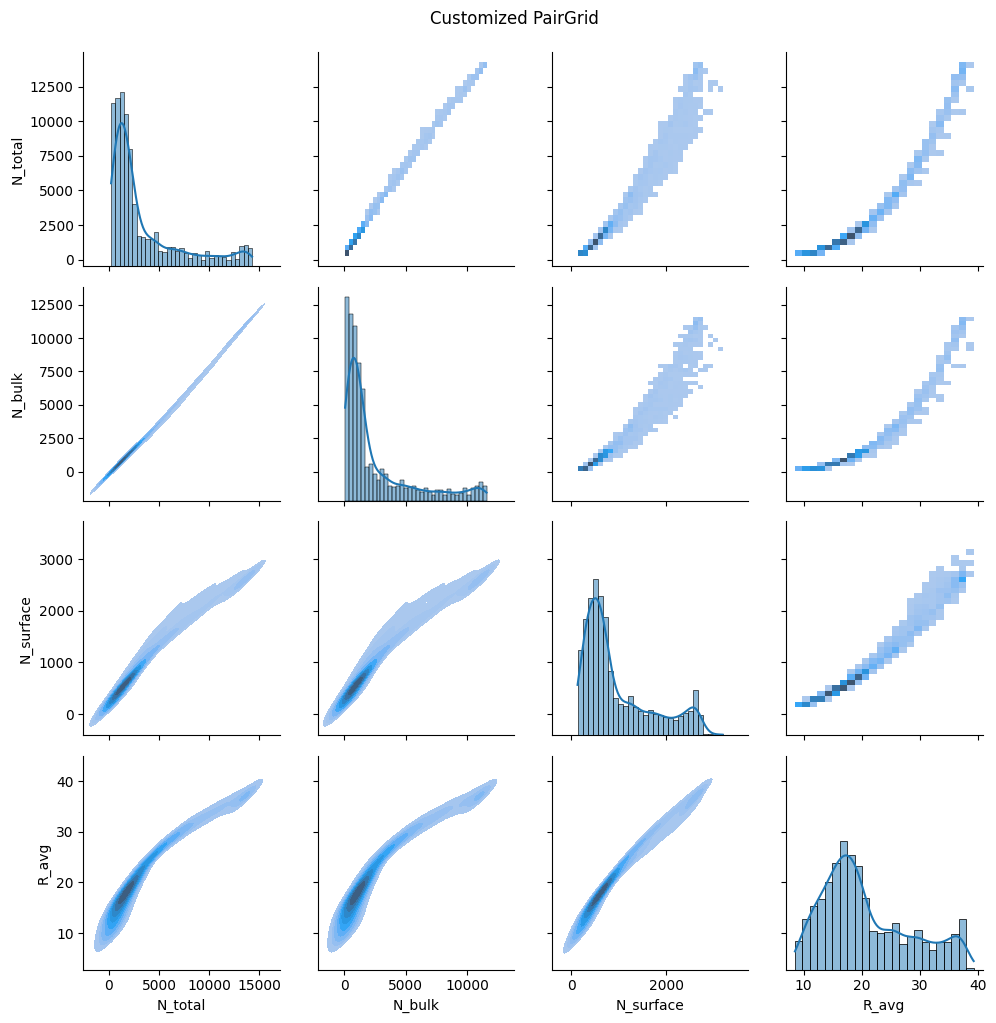

In [16]:
g = sns.PairGrid(new_df)
g.map_upper(sns.histplot)              # Upper triangle: bivariate hist
g.map_diag(sns.histplot, kde=True)     # Diagonal: hist + KDE
g.map_lower(sns.kdeplot, fill=True)    # Lower triangle: bivariate KDE
plt.suptitle("Customized PairGrid", y=1.02)
plt.show()
